# OpenSMILE Correlation
This notebook calculates Correlation and Cohen's d for effect size for the given conference data set.

In [1]:
import Helper as hp
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import itertools as it
from statsmodels.sandbox.stats.multicomp import multipletests
import statsmodels.api as sm
#import nltk
import scipy.stats as st
import statsmodels.formula.api as smf
import seaborn as sns
import itertools

#Read Data
data = pd.read_csv("CHI_2019_FULL.csv")

#Set Labels 
emotion_label = ['Anger', 'Boredom', 'Disgust', 'Fear', 'Happiness', 'Emo_Neutral', 'Sadness']
affect_label = ['Aggressiv', 'Cheerful', 'Intoxicated', 'Nervous', 'Aff_Neutral', 'Tired']
loi_label = ['Disinterest', 'Normal', 'High Interest']

#Get specific data and save it into new data frames
# We use the pandas .copy(deep=True) function to prevent the SettingWithCopyWarning we would otherwise get. Since we do
# not write, but only read from the data, the warning does not affect the data frames
df_emotion = data[['Anger', 'Boredom', 'Disgust', 'Fear', 'Happiness', 'Emo_Neutral', 'Sadness', 'Filename']].copy(deep=True)
df_affect = data[['Aggressiv', 'Cheerful', 'Intoxicated', 'Nervous', 'Aff_Neutral', 'Tired', 'Filename']].copy(deep=True)
df_loi = data[['Disinterest', 'Normal', 'High Interest', 'Filename']].copy(deep=True)
df_ar_val = data[['Arousal', 'Valence', 'Filename']].copy(deep=True)
#For further usage, we want to append the CharacterID as a column, which is saved with other information in the filename
#Since we only want the digits, we can remove all non-digit characters of the filename column and append the column to the df

df_emotion['Char_ID'] = df_emotion['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_affect['Char_ID'] = df_affect['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_loi['Char_ID'] = df_loi['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_ar_val['Char_ID'] = df_ar_val['Filename'].replace('\D+','', regex = True).copy(deep=True)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Correlation of arousal and other features

In [2]:
#'Clean' our dataFrames so that we can call the panda .corr function (default is spearman)
#Let's start with arousal and look how correlation is between emotions
print('Emotions and Arousal')
cor_ar_emo = hp.correlations(df_ar_val['Arousal'], df_emotion, emotion_label)
# Now arousal and affect
print('Affect and Arousal')
cor_ar_aff = hp.correlations(df_ar_val['Arousal'], df_affect, affect_label)
# Now arousal and level of Interest
print('Level of Interest and Arousal')
cor_ar_loi = hp.correlations(df_ar_val['Arousal'], df_loi, loi_label)

Emotions and Arousal
Correlation between Arousal and Anger: 0.2533512447856428
Cohen d: 1.3529032966662722
Correlation between Arousal and Boredom: -0.0036870145187188888
Cohen d: 0.6453943005779076
Correlation between Arousal and Disgust: 0.4241241156140213
Cohen d: -0.46933404614658275
Correlation between Arousal and Fear: 0.08566482304405383
Cohen d: 1.5443579910607268
Correlation between Arousal and Happiness: 0.2152754634891332
Cohen d: 1.540046170720318
Correlation between Arousal and Emo_Neutral: 0.0014961906063163722
Cohen d: 1.4885943903036558
Correlation between Arousal and Sadness: -0.40633522948680295
Cohen d: -2.4107029250142857
Affect and Arousal
Correlation between Arousal and Aggressiv: 0.5778022270881836
Cohen d: -0.5156606718698415
Correlation between Arousal and Cheerful: -0.07116740403866284
Cohen d: -2.4748898519830385
Correlation between Arousal and Intoxicated: 0.32978125667228647
Cohen d: 0.025668939616713144
Correlation between Arousal and Nervous: -0.166104382

In [3]:
cor_ar_emo[0]

[0.2533512447856428,
 -0.0036870145187188888,
 0.4241241156140213,
 0.08566482304405383,
 0.2152754634891332,
 0.0014961906063163722,
 -0.40633522948680295]

## Correlation of Valence and other features

In [4]:
print('Emotions and valence')
cor_val_emo = hp.correlations(df_ar_val['Valence'], df_emotion, emotion_label)

# Now valence and affect
print('Affect and valence')
cor_val_aff = hp.correlations(df_ar_val['Valence'], df_affect, affect_label)

# Now arousal and level of Interest
print('Level of Interest and valence')
cor_val_loi = hp.correlations(df_ar_val['Valence'], df_loi, loi_label)


cor_val = [cor_val_emo[0], cor_val_aff[0], cor_val_loi[0]]
cor_ar = [cor_ar_emo[0], cor_ar_aff[0], cor_ar_loi[0]]
corval = [item for sublist in cor_val for item in sublist]
corar = [item for sublist in cor_ar for item in sublist]

coh_val = [cor_val_emo[1], cor_val_aff[1], cor_val_loi[1]]
coh_ar = [cor_ar_emo[1], cor_ar_aff[1], cor_ar_loi[1]]
cohval = [item for sublist in coh_val for item in sublist]
cohar = [item for sublist in coh_ar for item in sublist]

cols = [emotion_label, affect_label, loi_label]
cols =  [item for sublist in cols for item in sublist]

Emotions and valence
Correlation between Valence and Anger: -0.14419432879424537
Cohen d: 0.4849790976021809
Correlation between Valence and Boredom: -0.23457441150671476
Cohen d: -0.1277721425646688
Correlation between Valence and Disgust: -0.07836997059746152
Cohen d: -0.925109681128954
Correlation between Valence and Fear: -0.250815212612479
Cohen d: 0.6781165981452872
Correlation between Valence and Happiness: -0.24658843112654744
Cohen d: 0.6687036695820676
Correlation between Valence and Emo_Neutral: -0.18371031296460075
Cohen d: 0.6136013490278798
Correlation between Valence and Sadness: 0.21236871426646572
Cohen d: -2.848157705534377
Affect and valence
Correlation between Valence and Aggressiv: -0.07881625755649777
Cohen d: -1.4847112963425138
Correlation between Valence and Cheerful: -0.023304974645073053
Cohen d: -3.5945811088331032
Correlation between Valence and Intoxicated: 0.07317887373630512
Cohen d: -1.2130804361127419
Correlation between Valence and Nervous: 0.08899957

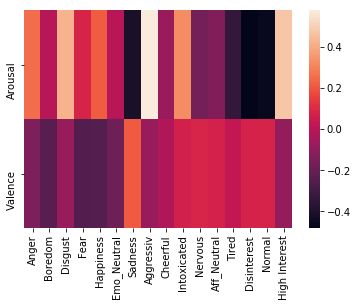

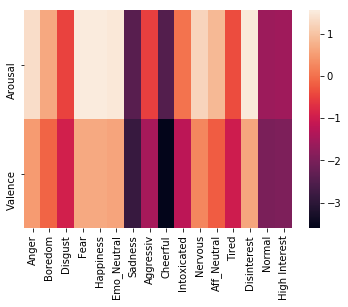

<Figure size 432x288 with 0 Axes>

In [5]:
d_cor = np.array([corar, corval])
d_coh = np.array([cohar, cohval])
df_arval_cor = pd.DataFrame(data = d_cor, index = ['Arousal', 'Valence'], columns = cols)
df_arval_cohen = pd.DataFrame(data = d_coh, index = ['Arousal', 'Valence'], columns = cols)
sns.heatmap(df_arval_cor)
plt.show()
plt.savefig("img/1_cor_arval.svg")
sns.heatmap(df_arval_cohen)
plt.show()
plt.savefig("img/1_coh_arval.svg")

## Correlation of different emotions and other features

In [6]:
# Now emotion and affect
print('ANGER')
print('Affect and anger')
cor_ang_aff = hp.correlations(df_emotion['Anger'], df_affect, affect_label)
# Now arousal and level of Interest
print('Level of Interest and anger')
cor_ang_loi = hp.correlations(df_emotion['Anger'], df_loi, loi_label)
##########
# Now look at boredom
print('BOREDOM')
print('Affect and boredom')
cor_bor_aff = hp.correlations(df_emotion['Boredom'], df_affect, affect_label)
# Now arousal and level of Interest
print('Level of Interest and boredom')
cor_bor_loi = hp.correlations(df_emotion['Boredom'], df_loi, loi_label)
##########
# Disgust
print('DISGUST')
print('Affect and disgust')
cor_dis_aff = hp.correlations(df_emotion['Disgust'], df_affect, affect_label)
# Now level of Interest
print('Level of Interest and disgust')
cor_dis_loi = hp.correlations(df_emotion['Disgust'], df_loi, loi_label)
######
# fear
print('FEAR')
print('Affect and fear')
cor_fea_aff = hp.correlations(df_emotion['Fear'], df_affect, affect_label)
# Now arousal and level of Interest
print('Level of Interest and fear')
cor_fea_loi = hp.correlations(df_emotion['Fear'], df_loi, loi_label)
##########
# happiness
print('HAPPINESS')
print('Affect and happiness')
cor_hap_aff = hp.correlations(df_emotion['Happiness'], df_affect, affect_label)
# Now level of Interest
print('Level of Interest and happiness')
cor_hap_loi = hp.correlations(df_emotion['Happiness'], df_loi, loi_label)
##########
# neutral
print('NEUTRAL')
print('Affect and neutral')
cor_eneu_aff = hp.correlations(df_emotion['Emo_Neutral'], df_affect, affect_label)
# Now arousal and level of Interest
print('Level of Interest and neutral')
cor_eneu_loi = hp.correlations(df_emotion['Emo_Neutral'], df_loi, loi_label)
##########
# Sadness
print('SADNESS')
print('Affect and sadness')
cor_sad_aff = hp.correlations(df_emotion['Sadness'], df_affect, affect_label)
# Now level of Interest
print('Level of Interest and sadness')
cor_sad_loi = hp.correlations(df_emotion['Sadness'], df_loi, loi_label)

ANGER
Affect and anger
Correlation between Anger and Aggressiv: 0.5708904917584502
Cohen d: -2.127998279307754
Correlation between Anger and Cheerful: -0.11992611272518035
Cohen d: -4.406585027155091
Correlation between Anger and Intoxicated: -0.05158200434790607
Cohen d: -2.4254119779242442
Correlation between Anger and Nervous: -0.28885245075145494
Cohen d: -0.5185726446443258
Correlation between Anger and Aff_Neutral: -0.2151352723620212
Cohen d: -1.205083505019607
Correlation between Anger and Tired: -0.18015673614927033
Cohen d: -1.2923700796725435
Level of Interest and anger
Correlation between Anger and Disinterest: -0.18631739619874624
Cohen d: 0.12722263742232137
Correlation between Anger and Normal: -0.10487680261261337
Cohen d: -2.1884147992572993
Correlation between Anger and High Interest: 0.11157406711165013
Cohen d: -2.1519325372385447
BOREDOM
Affect and boredom
Correlation between Boredom and Aggressiv: 0.19728554188330352
Cohen d: -1.1920017003478987
Correlation betwee

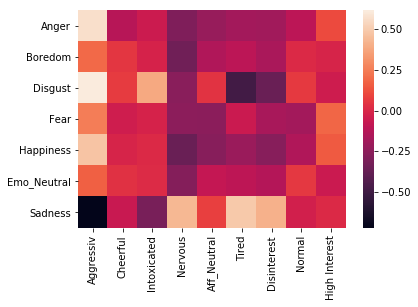

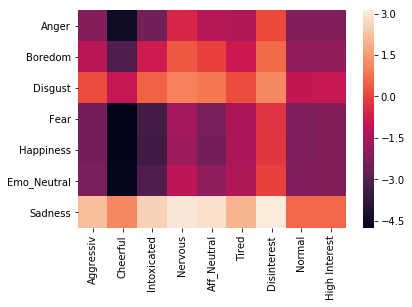

<Figure size 432x288 with 0 Axes>

In [7]:
ang_cor = [cor_ang_aff[0], cor_ang_loi[0]]
bor_cor = [cor_bor_aff[0], cor_bor_loi[0]]
dis_cor = [cor_dis_aff[0], cor_dis_loi[0]]
fea_cor = [cor_fea_aff[0], cor_fea_loi[0]]
hap_cor = [cor_hap_aff[0], cor_hap_loi[0]]
ene_cor = [cor_eneu_aff[0],cor_eneu_loi[0]]
sad_cor = [cor_sad_aff[0], cor_sad_loi[0]]

ang_cor = [item for sublist in ang_cor for item in sublist]
bor_cor = [item for sublist in bor_cor for item in sublist]
dis_cor = [item for sublist in dis_cor for item in sublist]
fea_cor = [item for sublist in fea_cor for item in sublist]
hap_cor = [item for sublist in hap_cor for item in sublist]
ene_cor = [item for sublist in ene_cor for item in sublist]
sad_cor = [item for sublist in sad_cor for item in sublist]

ang_coh = [cor_ang_aff[1], cor_ang_loi[1]]
bor_coh = [cor_bor_aff[1], cor_bor_loi[1]]
dis_coh = [cor_dis_aff[1], cor_dis_loi[1]]
fea_coh = [cor_fea_aff[1], cor_fea_loi[1]]
hap_coh = [cor_hap_aff[1], cor_hap_loi[1]]
ene_coh = [cor_eneu_aff[1],cor_eneu_loi[1]]
sad_coh = [cor_sad_aff[1], cor_sad_loi[1]]

ang_coh = [item for sublist in ang_coh for item in sublist]
bor_coh = [item for sublist in bor_coh for item in sublist]
dis_coh = [item for sublist in dis_coh for item in sublist]
fea_coh = [item for sublist in fea_coh for item in sublist]
hap_coh = [item for sublist in hap_coh for item in sublist]
ene_coh = [item for sublist in ene_coh for item in sublist]
sad_coh = [item for sublist in sad_coh for item in sublist]

d_emo_cor = np.array([ang_cor, bor_cor, dis_cor, fea_cor, hap_cor, ene_cor, sad_cor])
d_emo_coh = np.array([ang_coh, bor_coh, dis_coh, fea_coh, hap_coh, ene_coh, sad_coh])
cols = [affect_label, loi_label]
cols = [item for sublist in cols for item in sublist]


df_emo_cor = pd.DataFrame(data = d_emo_cor, index = emotion_label, columns = cols)
sns.heatmap(df_emo_cor)
plt.show()
plt.savefig("img/1_cor_emo.svg")

df_emo_coh = pd.DataFrame(data = d_emo_coh, index = emotion_label, columns = cols)
sns.heatmap(df_emo_coh)
plt.show()
plt.savefig("img/1_coh_emo.svg")

## Correlation of affect and other features

In [8]:
##########
# Aggressiv
print('AGGRESSIV')
print('Level of Interest and aggressiv')
cor_agg_loi = hp.correlations(df_affect['Aggressiv'], df_loi, loi_label)
##########
# Cheerful
print('CHEERFUL')
print('Level of Interest and cheerful')
cor_che_loi = hp.correlations(df_affect['Cheerful'], df_loi, loi_label)
##########
# Intoxicated
print('INTOXICATED')
print('Level of Interest and intoxicated')
cor_tox_loi = hp.correlations(df_affect['Intoxicated'], df_loi, loi_label)
##########
# Nervous
print('NERVOUS')
print('Level of Interest and nervous')
cor_ner_loi = hp.correlations(df_affect['Nervous'], df_loi, loi_label)
##########
# Neutral
print('NEUTRAL')
print('Level of Interest and neutral')
# Now intoxicated and level of Interest
cor_aneu_loi = hp.correlations(df_affect['Aff_Neutral'], df_loi, loi_label)
#########
# Tired
print('TIRED')
print('Level of Interest and tired')
cor_tir_loi = hp.correlations(df_affect['Tired'], df_loi, loi_label)

cor_tir_loi[0]

AGGRESSIV
Level of Interest and aggressiv
Correlation between Aggressiv and Disinterest: -0.5035108004314506
Cohen d: 2.3653498901858
Correlation between Aggressiv and Normal: -0.07346396727972318
Cohen d: -1.3623815388434293
Correlation between Aggressiv and High Interest: 0.09476873201140446
Cohen d: -1.3400008925035496
CHEERFUL
Level of Interest and cheerful
Correlation between Cheerful and Disinterest: -0.21391560164920745
Cohen d: 4.734178001006983
Correlation between Cheerful and Normal: 0.17900516646018097
Cohen d: -0.35565755978785973
Correlation between Cheerful and High Interest: -0.166743920564769
Cohen d: -0.34736881889899335
INTOXICATED
Level of Interest and intoxicated
Correlation between Intoxicated and Disinterest: -0.11234655823114223
Cohen d: 3.370070197976664
Correlation between Intoxicated and Normal: 0.18348408517710574
Cohen d: -1.6790729746609272
Correlation between Intoxicated and High Interest: -0.175678570174124
Cohen d: -1.650234767338266
NERVOUS
Level of Int

[0.4214491922187518, -0.19661726172312718, 0.17484357052370333]

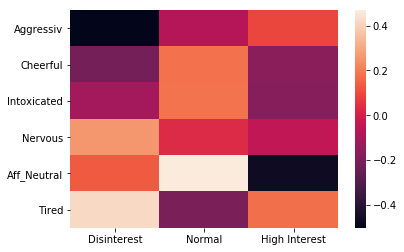

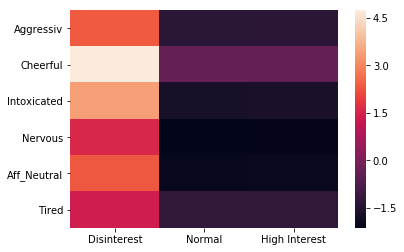

<Figure size 432x288 with 0 Axes>

In [9]:
d_aff_cor = np.array([cor_agg_loi[0], cor_che_loi[0], cor_tox_loi[0], cor_ner_loi[0], cor_aneu_loi[0], cor_tir_loi[0]])
d_aff_coh = np.array([cor_agg_loi[1], cor_che_loi[1], cor_tox_loi[1], cor_ner_loi[1], cor_aneu_loi[1], cor_tir_loi[1]])

df_aff_cor = pd.DataFrame(data = d_aff_cor, index = affect_label, columns = loi_label)
sns.heatmap(df_aff_cor)
plt.show()
plt.savefig("img/1_cor_aff.svg")

df_aff_coh = pd.DataFrame(data = d_aff_coh, index = affect_label, columns = loi_label)
sns.heatmap(df_aff_coh)
plt.show()
plt.savefig("img/1_coh_aff.svg")